## Projek Prediksi Harga Rumah di US 🤨 🧐
1. Business Understanding 😇
Disini aku mau mencoba untuk memprediksi Harga rumah di Kabupaten King di Provinsi Washington😆 di Negara US. Seperti yang diketahui bahwa harga rumah-rumah akhir dekade ini mengalami peningkatan yang signifikan di seluruh Dunia. Namun masih banyak orang, khususnya generasi anak muda, saat ini masih sedikit yang melek akan peningkatan harga Rumah 😱😱. Salah satu step atau solusi untuk membuka mata generasi anak muda yaitu dengan melihat bagaimana perkembangan dan prediksi harga rumah kedepannya. Maka dari itu salah satu solusi yang bisa saya buat yaitu model prediksi (kalau bisa sampai tahap deploy dengan azure/aws). Pada kernel ini sebagian besar saya akan menggunakan beberapa teknik dari regresi linear. Ayoo 🫡

 2. Data Understanding 😁
King County adalah rumah bagi kota terbesar dan kelima terbesar di kota Bagian Washington, yaitu Seattle dan Bellevue, yang bersama dengan kota terbesar ketiga, Tacoma, membentuk wilayah metropolitan Seattle. Dataset yang digunakan didapat dari kaggle atau kc_house_data dimana fitur-fiturnya berisikan
- id: primary keynya
- date: waktu timeseries dari data dimasukkan
- price: harga rumah
- bedrooms: jumlah kamar
- bathrooms: jumlah kamar mandi
- sqft_living: luas bangunan/rumah meter persegi
- sqft_lot: luas tanah
- floors: jumlah lantai
- waterfront: ada pemandangan perairan
- view: jumlah rumah tersebut dilihat (dikategorikan menjadi 4: angka 4 artinya rame dilihat)
- condition: seberapa bagus kondisi rumah tersebut
- grade: skor atau tingkatan rumah yang diberikan oleh pemerintah setempat
- sqft_above: luas rumah juga tapi selain basemen
- sqft_basement: luas basemen
- yr_built: tahun rumah dibangun
- yr_renovated: tahun rumah direnovasi
- zipcode: kode pos
- lat: latitude
- long: longitude
- sqft_living15: luas ruang tamu di rumah
- sqft_lot15: luas tanah kavling di rumahnya
### 3. Data Preparation: Feature Engineering 😢
- Binning
- Scaling
- Outlier Removal
- Transformasi Data

### 4. Modelling 😨 😰
- Linear Regression
- OLS
- Elastic Net
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boost

### 5. Evaluation 🧐 🤓 😎
- MSE
- RMSE
- R2

In [ ]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=394f16a6d8053e953db4e9c54973380825408e5c6771231d3864d5b6b960440c
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
import os
import glob
import json
import pickle
import folium
%matplotlib inline
from math import sqrt
from pyforest import *
from google.colab import drive

import branca.colormap as cm
from datetime import datetime
plt.style.use("fivethirtyeight")

from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import bias_variance_decomp
from sklearn.feature_selection import RFE, SelectKBest, f_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

from sklearn import tree
from functools import partial
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

<IPython.core.display.Javascript object>

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/harga_rumah_1.csv")

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  zipcode        21597 non-null  int64  
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  sale_age       21597 non-null  int64  
 14  umur           21597 non-null  int64  
 15  rennovated     21597 non-null  int64  
 16  basement       21597 non-null  int64  
 17  viewed         21597 non-null  int64  
dtypes: flo

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540202.919757,367133.730890,78000.00,322000.0,450000.0,645000.0,7700000.0
bedrooms,21597.0,3.371811,0.904096,1.00,3.0,3.0,4.0,11.0
bathrooms,21597.0,1.751528,0.732116,0.25,1.0,2.0,2.0,8.0
sqft_living,21597.0,2080.321850,918.106125,370.00,1430.0,1910.0,2550.0,13540.0
sqft_lot,21597.0,15099.408760,41412.636876,520.00,5040.0,7618.0,10685.0,1651359.0
floors,21597.0,1.494096,0.539683,1.00,1.0,1.5,2.0,3.5
waterfront,21597.0,0.007547,0.086549,0.00,0.0,0.0,0.0,1.0
condition,21597.0,3.409825,0.650546,1.00,3.0,3.0,4.0,5.0
grade,21597.0,7.657915,1.173200,3.00,7.0,7.0,8.0,13.0
sqft_above,21597.0,1788.596842,827.759761,370.00,1190.0,1560.0,2210.0,9410.0


#### Lanjut Feature Engineering

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'sale_age', 'umur', 'rennovated',
       'basement', 'viewed'],
      dtype='object')

In [ ]:
cols_to_encode = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode']

In [ ]:
df[cols_to_encode] = df[cols_to_encode].astype(str)

In [ ]:
encoder = OneHotEncoder(sparse_output=False) # bawa arry, semua nilai akan disimpan

In [ ]:
encoded_features = encoder.fit_transform(df[cols_to_encode])

In [ ]:
new_columns = encoder.get_feature_names_out(cols_to_encode)
df_encoded = pd.DataFrame(encoded_features, columns=new_columns)
df_encoded.head(5)

<IPython.core.display.Javascript object>

,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_encoded.dtypes)

bedrooms_1       float64
bedrooms_10      float64
bedrooms_11      float64
bedrooms_2       float64
bedrooms_3       float64
                  ...   
zipcode_98177    float64
zipcode_98178    float64
zipcode_98188    float64
zipcode_98198    float64
zipcode_98199    float64
Length: 112, dtype: object


Target atau kolom price itu skew ke kanan. Sehingga kita akan coba untuk transformasi dengan log

harga sudah memiliki distribusi yang normal

#### Polinomial (transformer) dan Fitur
menyiapkan data supaya siap terhadap model regresi linear. memilih model tersebut dikarenakan hasil viz dan analisis pada file sebelumnya

In [ ]:
# Ambil kolom untuk fitur polinominal dan dari data asli tanpa variabel dummynya
poly_feat = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode'], axis=1)
y = df['price']

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False) # objek
poly_data = poly.fit_transform(poly_feat)
poly_columns = poly.get_feature_names_out(poly_feat.columns) # ambil
df_poly = pd.DataFrame(poly_data, columns=poly_columns) # df

<IPython.core.display.Javascript object>

In [ ]:
X = pd.concat([df_poly, df_encoded], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
X.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,umur,rennovated,basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180.0,5650.0,0.0,1180.0,1340.0,5650.0,59.0,59.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2570.0,7242.0,0.0,2170.0,1690.0,7639.0,23.0,63.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,770.0,10000.0,0.0,770.0,2720.0,8062.0,82.0,82.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1960.0,5000.0,0.0,1050.0,1360.0,5000.0,49.0,49.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1680.0,8080.0,0.0,1680.0,1800.0,7503.0,28.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

#### Coba Modelling, ingatt Try and Error

In [ ]:
# bikin fungsi untuk menguji atau mengevaluasi modell regresi
def rmse(y, y_pred):
    return round(np.sqrt(mean_squared_error(y, y_pred)), 2)

def bias(y, y_pred):
    return round(np.mean(y_pred - y), 2)

def variance(y, y_pred):
    return np.mean([yi**2 for yi in y_pred]) - np.mean(y_pred)**2

def train_test_metrics(y_tr, y_tt, y_tr_pred, y_tt_pred):
    print('Skor Latih R^2: ', round(r2_score(y_tr, y_tr_pred), 4))
    print('Skor Latih MAE: ', int(mean_absolute_error(y_tr, y_tr_pred)))
    print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tr, y_tr_pred)))
    print('Skor Latih RMSE: ', int(rmse(y_tr, y_tr_pred)))
    print('Skor Latih Bias: ', round(bias(y_tr, y_tr_pred), 2))
    print('Skor Latih Variance: ', "{:.4e}".format(np.var(y_tr_pred)))
    print("")
    print('Skor Latih R^2 Score: ', round(r2_score(y_tt, y_tt_pred), 4))
    print('Skor Latih MAE: ', int(mean_absolute_error(y_tt, y_tt_pred)))
    print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tt, y_tt_pred)))
    print('Skor Latih RMSE: ', int(rmse(y_tt, y_tt_pred)))
    print('Skor Latih Bias: ', round(bias(y_tt, y_tt_pred), 2))
    print('Skor Latih Variance: ', "{:.4e}".format(np.var(y_tt_pred)))

In [ ]:
# linear regresi 1
X_tr, X_tt, y_tr, y_tt = train_test_split(X, y, random_state=42, test_size=0.25, shuffle=True)

In [ ]:
model = LinearRegression()
lm = model.fit(X_tr, y_tr)
y_tr_pred = lm.predict(X_tr)
y_tt_pred = lm.predict(X_tt)

In [ ]:
train_test_metrics(y_tr, y_tt, y_tr_pred, y_tt_pred)
print("")
av_mse, av_bias, av_var = bias_variance_decomp(model, X_tr.values, y_tr.values, X_tt.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(av_mse))
print('Rata-rata bias: ', "{:.4e}".format(av_bias))
print('Rata-rata varians: ', "{:.4e}".format(av_var))

Skor Latih R^2:  0.8667
Skor Latih MAE:  81488
Skor Latih MSE:  1.7862e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  133648


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1616e+11

Skor Latih R^2 Score:  0.8591
Skor Latih MAE:  83437
Skor Latih MSE:  1.9317e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  138986


<IPython.core.display.Javascript object>

Skor Latih Bias:  12.27


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1849e+11

Rata-rata loss yang diharapkan:  2.0564e+10
Rata-rata bias:  1.9441e+10
Rata-rata varians:  1.1236e+09


<IPython.core.display.Javascript object>

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.900e+01, 1.770e+02, 4.775e+03,
        3.780e+02, 3.500e+01, 9.000e+00, 4.000e+00]),
 array([-1930536.24605474, -1586905.34442813, -1243274.44280153,
         -899643.54117492,  -556012.63954832,  -212381.73792172,
          131249.16370489,   474880.06533149,   818510.96695809,
         1162141.8685847 ,  1505772.7702113 ]),
 <BarContainer object of 10 artists>)

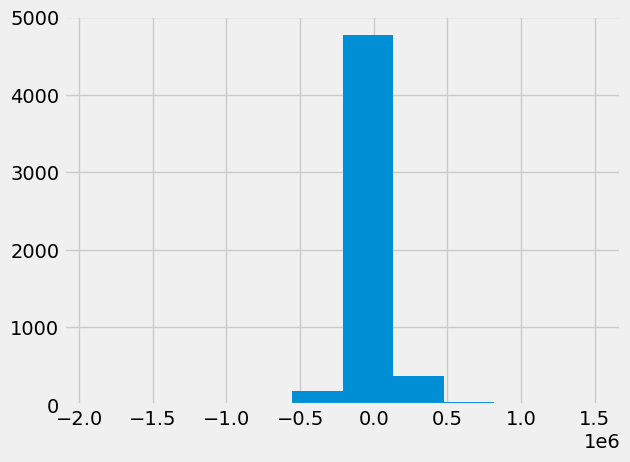

In [ ]:
residual = (y_tt - y_tt_pred)
plt.hist(residual)

<IPython.core.display.Javascript object>

<Axes: ylabel='price'>

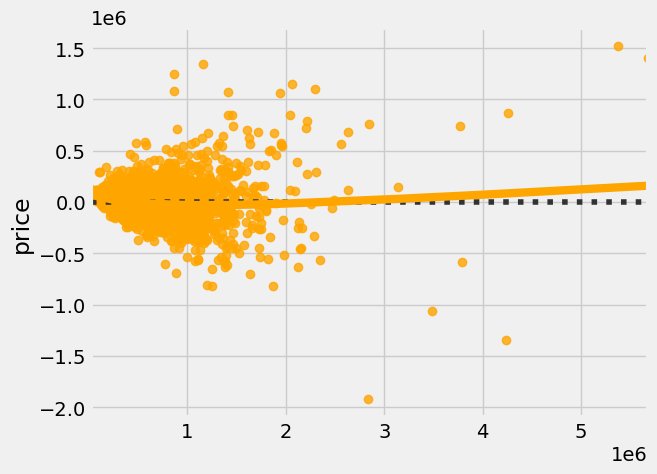

In [ ]:
# viz untuk memeriksa heteroskedastisitas
sns.residplot(x=y_tt_pred, y=y_tt, lowess=True, color='orange')

Kalau dilihat dari hasil train dan test. kita bisa liat bahwa hasil RMSE train dan RMSE test memilki kenaikan yang mungkin saya khawatir akan model yang mengalami overfitting, yang mungkin saja dikarenakan model masih terlalu kompleks seperti masih adanya fitur-fitur yang ternyata tidak terlalu dibutuhkan. Maka dari itu selanjutnya aku mau nentuin fitur yang benar-benar dipakai.

#### seleksi fitur

In [128]:
# K Best
kb = SelectKBest(f_regression, k=20) #objek dengan 20 fitur terbaik
kbest = kb.fit(X_tr, y_tr)

sel_columns = X_tr.columns[kbest.get_support()]
rem_columns = X_tr.columns[~kbest.get_support()]

In [129]:
list(sel_columns)

['sqft_living',
 'sqft_above',
 'sqft_living15',
 'viewed',
 'sqft_living^2',
 'sqft_living sqft_above',
 'sqft_living sqft_living15',
 'sqft_living umur',
 'sqft_living basement',
 'sqft_living viewed',
 'sqft_above^2',
 'sqft_above sqft_living15',
 'sqft_above basement',
 'sqft_above viewed',
 'sqft_living15^2',
 'sqft_living15 viewed',
 'basement viewed',
 'viewed^2',
 'grade_10',
 'grade_11']

sqft_living, sqft_above, viewed, dan sqft_living15 mungkin memilki korelasi yang cukup kuat

In [ ]:
# coba terapkan fitur tersebut aja ke regresi
kbest = LinearRegression().fit(X_tr[sel_columns], y_tr)
y_kb_tr_pred = kbest.predict(X_tr[sel_columns])
y_kb_tt_pred = kbest.predict(X_tt[sel_columns])

In [ ]:
train_test_metrics(y_tr, y_tt, y_kb_tr_pred, y_kb_tt_pred)
print("")

kb_mse, kb_bias, kb_var = bias_variance_decomp(kbest, X_tr.values, y_tr.values, X_tt.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(kb_mse))
print('Rata-rata bias: ', "{:.4e}".format(kb_bias))
print('Rata-rata varians: ', "{:.4e}".format(kb_var))

Skor Latih R^2:  0.6252
Skor Latih MAE:  148272
Skor Latih MSE:  5.0232e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  224125


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  8.3787e+10

Skor Latih R^2 Score:  0.6417
Skor Latih MAE:  149130
Skor Latih MSE:  4.9106e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  221599


<IPython.core.display.Javascript object>

Skor Latih Bias:  1145.42


<IPython.core.display.Javascript object>

Skor Latih Variance:  8.4302e+10

Rata-rata loss yang diharapkan:  2.0564e+10
Rata-rata bias:  1.9441e+10
Rata-rata varians:  1.1236e+09


masih pengen liat pov dari teknik seleksi fitur yang lain dlu

In [ ]:
X_tr.shape[1]

189

In [ ]:
# Correlation-Based Feature Selection
correlation_matrix = X_tr.corrwith(y_tr)
num_features = 20
selected_features = correlation_matrix.abs().nlargest(num_features).index

In [ ]:
model = LinearRegression()
model.fit(X_tr[selected_features], y_tr)

y_cb_tr_pred = model.predict(X_tr[selected_features])
y_cb_tt_pred = model.predict(X_tt[selected_features])

In [ ]:
# Evaluasi performa model
print("Performance Metrics for Selected Features:")
train_test_metrics(y_tr, y_tt, y_cb_tr_pred, y_cb_tt_pred)

print("")

cb_mse, cb_bias, cb_var = bias_variance_decomp(model, X_tr.values, y_tr.values, X_tt.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(cb_mse))
print('Rata-rata bias: ', "{:.4e}".format(cb_bias))
print('Rata-rata varians: ', "{:.4e}".format(cb_var))

Performance Metrics for Selected Features:
Skor Latih R^2:  0.6252
Skor Latih MAE:  148272
Skor Latih MSE:  5.0232e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  224125


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  8.3787e+10

Skor Latih R^2 Score:  0.6417
Skor Latih MAE:  149130
Skor Latih MSE:  4.9106e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  221599


<IPython.core.display.Javascript object>

Skor Latih Bias:  1145.42


<IPython.core.display.Javascript object>

Skor Latih Variance:  8.4302e+10

Rata-rata loss yang diharapkan:  2.0564e+10
Rata-rata bias:  1.9441e+10
Rata-rata varians:  1.1236e+09


In [ ]:
list(selected_features)

['sqft_living^2',
 'sqft_living sqft_living15',
 'sqft_living',
 'sqft_living sqft_above',
 'sqft_above sqft_living15',
 'sqft_above^2',
 'sqft_living15^2',
 'sqft_above',
 'sqft_living15',
 'sqft_living viewed',
 'sqft_above viewed',
 'sqft_living15 viewed',
 'sqft_above basement',
 'sqft_living basement',
 'viewed',
 'viewed^2',
 'grade_11',
 'basement viewed',
 'sqft_living umur',
 'grade_10']

In [123]:
selected_features_df = pd.DataFrame(selected_features, columns=None)
selected_features_df

0                 sqft_living^2
1     sqft_living sqft_living15
2                   sqft_living
3        sqft_living sqft_above
4      sqft_above sqft_living15
5                  sqft_above^2
6               sqft_living15^2
7                    sqft_above
8                 sqft_living15
9            sqft_living viewed
10            sqft_above viewed
11         sqft_living15 viewed
12          sqft_above basement
13         sqft_living basement
14                       viewed
15                     viewed^2
16                     grade_11
17              basement viewed
18             sqft_living umur
19                     grade_10
Name: 0, dtype: object

In [ ]:
lm = LinearRegression()
rfe = RFECV(estimator=lm, step=1, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rfecv = rfe.fit(X_tr, y_tr)
selected = X_tr.columns[rfe.support_]
print("Jumlah optimal dari fitur adalah : %d" % rfe.n_features_)

Jumlah optimal dari fitur adalah : 189


In [ ]:
removed = X_tr.columns[~rfe.support_]
list(removed)

[]

In [ ]:
X_tr

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,umur,rennovated,basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6405,1880.0,4499.0,0.0,1880.0,2130.0,5114.0,22.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937,2020.0,6564.0,0.0,1310.0,1710.0,5151.0,20.0,20.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19076,4720.0,493534.0,0.0,3960.0,2160.0,219542.0,40.0,40.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15201,1430.0,3880.0,0.0,1430.0,1430.0,3880.0,66.0,66.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,2270.0,32112.0,0.0,1740.0,2310.0,41606.0,34.0,34.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2230.0,5800.0,0.0,2230.0,2230.0,6088.0,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21575,2770.0,3852.0,0.0,2770.0,1810.0,5641.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5390,1530.0,9000.0,0.0,1530.0,1520.0,8500.0,38.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,380.0,15000.0,0.0,380.0,1170.0,15000.0,51.0,51.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


ternyata jika menggunakan teknik fitur seleksi RFECV itu

In [ ]:
X_tr.shape[1]

189

ternyata setelah menggunakan teknik seleksi fitur RFECV itu ditemukan bahwa semua fitur pada X training itu digunakan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

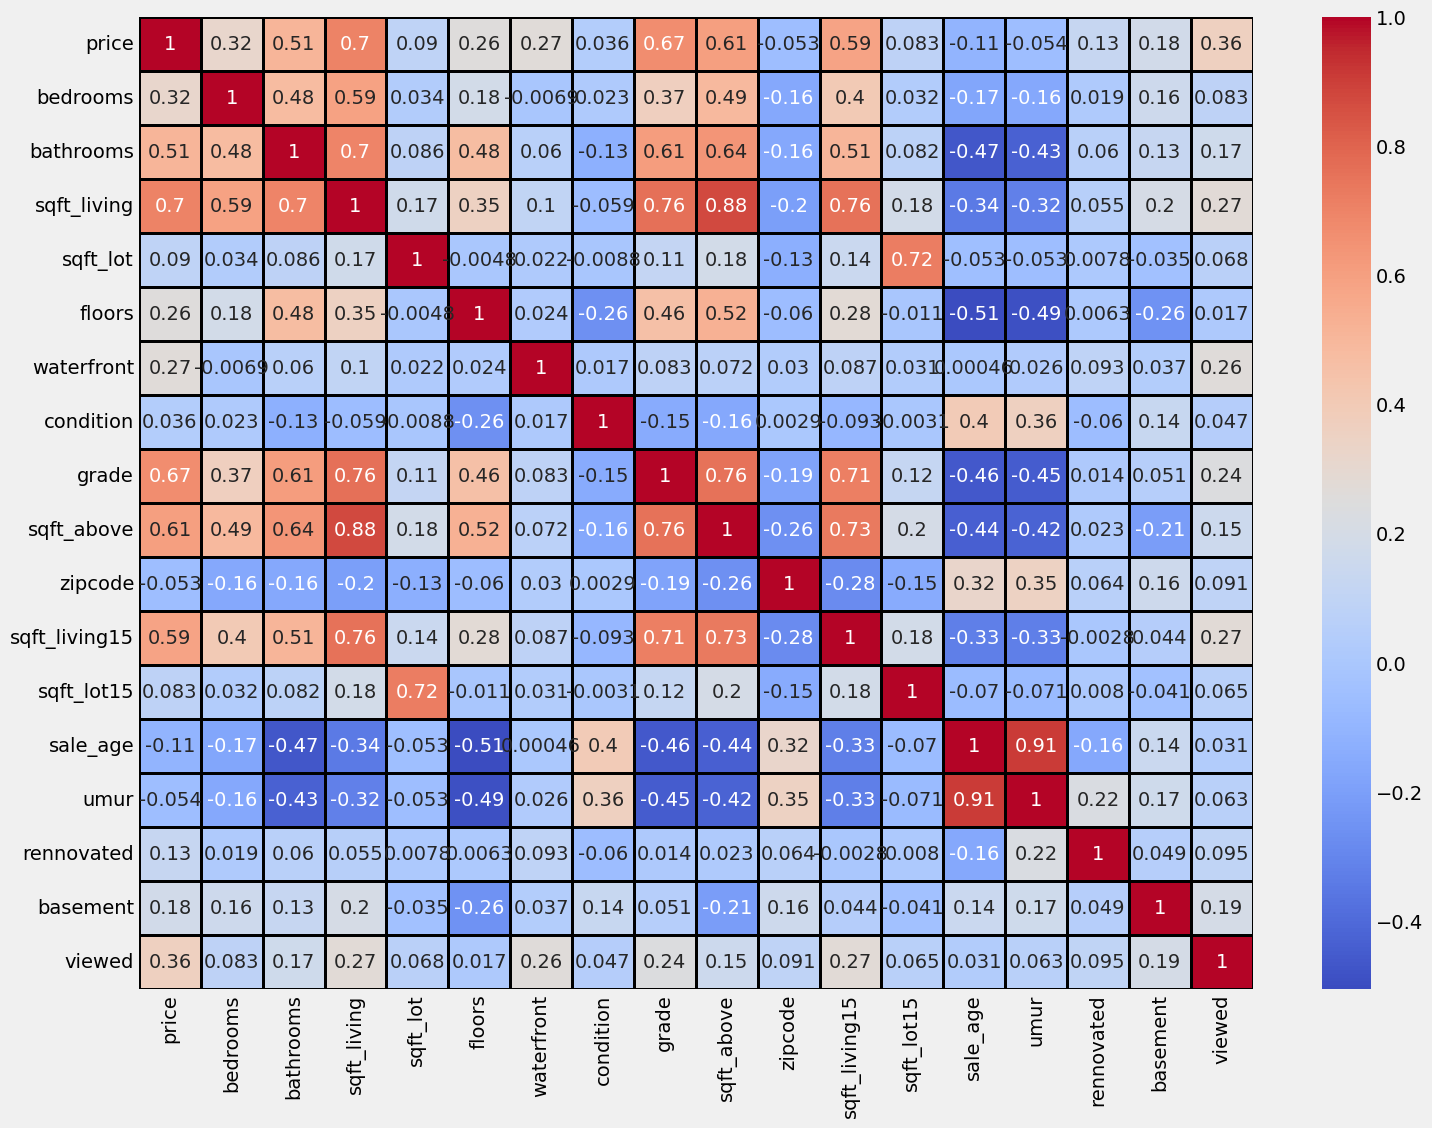

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.show()

In [ ]:
# cols_to_encode = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode']

# encoder = OneHotEncoder(sparse_output=False)
# encoded_features = encoder.fit_transform(df[cols_to_encode])
# new_columns = encoder.get_feature_names_out(cols_to_encode)

# df_encoded = pd.DataFrame(encoded_features, columns=new_columns)

# poly_feat = df.drop(['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode', 'sqft_lot15'], axis=1)
# y = df['price']

# X = pd.concat([poly_feat, df_encoded], axis=1)

# X.head()


# # Linear Regression percobaan 2
# X_tr2, X_tt2, y_tr2, y_tt2 = train_test_split(X, y, random_state=42, test_size=0.25)
# lm2 = LinearRegression().fit(X_tr2, y_tr2)
# y_tr_pred2 = lm2.predict(X_tr2)
# y_tt_pred2 = lm2.predict(X_tt2)

# train_test_metrics(y_tr2, y_tt2, y_tr_pred2, y_tt_pred2)
# print("")

# av2_mse, av2_bias, av2_var = bias_variance_decomp(model, X_tr2.values, y_tr2.values, X_tt2.values, y_tt2.values, loss='mse', random_seed=42)
# print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(av2_mse))
# print('Rata-rata bias: ', "{:.4e}".format(av2_bias))
# print('Rata-rata varians: ', "{:.4e}".format(av2_var))

#### Scaling dengan Ridge dan Lasso untuk regresi
- Ridge atau L2 itu untuk meminimalkan kesalahan prediksi model bisa juga untuk menangani overfitting dengan mendorong koefisien model untuk tetap kecil.
- Lasso dia bisa seleksi fitur otomatis dan juga mendorong koefisien sampai dengan nol (berbeda dikit dengan ridge)
- ElasticNet bertujuan untuk menemukan atau cari keseimbangan dari ridge dan lasso

In [ ]:
# Regresi Ridge
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_tr)
X_test_scaled = ss.fit_transform(X_tt)
X_tr_sc = pd.DataFrame(X_train_scaled, columns=X_tr.columns)
X_tt_sc = pd.DataFrame(X_test_scaled, columns=X_tt.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_tr_sc.shape[0]

16197

In [ ]:
X_tt_sc.shape[0]

5400

In [ ]:
ridge = Ridge(alpha=1).fit(X_tr_sc, y_tr)
y_ridge_tr = ridge.predict(X_tr_sc)
y_ridge_tt = ridge.predict(X_tt_sc)

train_test_metrics(y_tr, y_tt, y_ridge_tr, y_ridge_tt)
print("")

rdg_mse, rdg_bias, rdg_var = bias_variance_decomp(ridge, X_tr_sc.values, y_tr.values, X_tt_sc.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(rdg_mse))
print('Rata-rata bias: ', "{:.4e}".format(rdg_bias))
print('Rata-rata varians: ', "{:.4e}".format(rdg_var))

<IPython.core.display.Javascript object>

Skor Latih R^2:  0.8667
Skor Latih MAE:  81497
Skor Latih MSE:  1.7864e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  133655


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1613e+11

Skor Latih R^2 Score:  0.8555
Skor Latih MAE:  83859
Skor Latih MSE:  1.9799e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  140709


<IPython.core.display.Javascript object>

Skor Latih Bias:  3928.68


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1632e+11

Rata-rata loss yang diharapkan:  2.0922e+10
Rata-rata bias:  1.9905e+10
Rata-rata varians:  1.0165e+09


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nilai alpha yang optimal adalah: 130


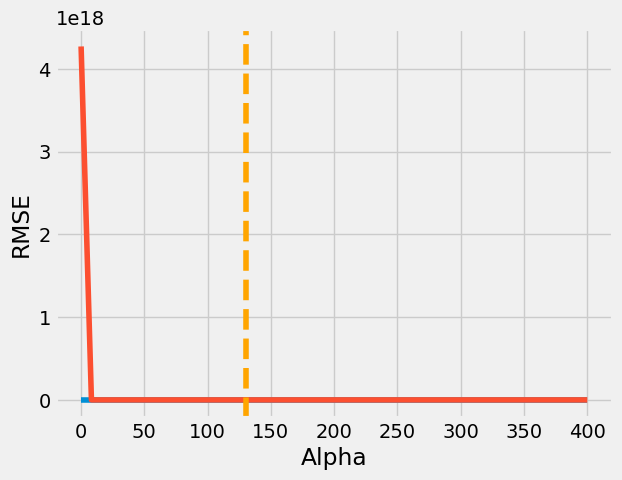

In [ ]:
tr_rmse_ridge = []
tt_rmse_ridge = []
alphas_ridge = []

for alpha in np.linspace(0, 400, num=50): #mencari nilai atau cros validasi untuk parameter alpha terbaik
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_sc, y_tr)
    tr_pred = ridge.predict(X_tr_sc)
    tr_rmse_ridge.append(np.sqrt(mean_squared_error(y_tr, tr_pred)))
    tt_pred = ridge.predict(X_tt_sc)
    tt_rmse_ridge.append(np.sqrt(mean_squared_error(y_tt, tt_pred)))
    alphas_ridge.append(alpha)

fig, ax = plt.subplots()
ax.plot(alphas_ridge, tr_rmse_ridge, label="Train") #latih
ax.plot(alphas_ridge, tt_rmse_ridge, label="Test") #uji
ax.set_xlabel("Alpha")
ax.set_ylabel("RMSE")
optimal_alpha = alphas_ridge[np.argmin(tt_rmse_ridge)]
ax.axvline(optimal_alpha, color="orange", linestyle="--")
print(f'Nilai alpha yang optimal adalah: {int(optimal_alpha)}')

In [148]:
# terapkan alpha adalah 8
ridge_best = Ridge(alpha=8)
ridge_best.fit(X_tr_sc, y_tr)
y_best_ridge_tr = ridge_best.predict(X_tr_sc)
y_best_ridge_tt = ridge_best.predict(X_tt_sc)

train_test_metrics(y_tr, y_tt, y_best_ridge_tr, y_best_ridge_tt)
print("")

rdgb_mse, rdgb_bias, rdgb_var = bias_variance_decomp(ridge_best, X_tr_sc.values, y_tr.values, X_tt_sc.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(rdgb_mse))
print('Rata-rata bias: ', "{:.4e}".format(rdgb_bias))
print('Rata-rata varians: ', "{:.4e}".format(rdgb_var))

<IPython.core.display.Javascript object>

Skor Latih R^2:  0.8666
Skor Latih MAE:  81496
Skor Latih MSE:  1.7878e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  133709


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1603e+11

Skor Latih R^2 Score:  0.8553
Skor Latih MAE:  83873
Skor Latih MSE:  1.9829e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  140813


<IPython.core.display.Javascript object>

Skor Latih Bias:  3928.68


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1648e+11

Rata-rata loss yang diharapkan:  2.0833e+10
Rata-rata bias:  1.9900e+10
Rata-rata varians:  9.3303e+08


In [ ]:
#absolut
top_feat_ridge = pd.DataFrame(np.abs(ridge.coef_), index=np.array(X_tr_sc.columns), columns=['importance']).sort_values('importance', ascending=False)
top_feat_ridge.head(20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,importance
sqft_living sqft_living15,175388.214660
sqft_above sqft_living15,90602.955390
sqft_above rennovated,78414.163694
umur,77575.100624
sale_age,73263.852919
sqft_above umur,69793.408485
sqft_living15 sale_age,68015.245701
umur viewed,65507.542529
sqft_lot,63202.753587
zipcode_98004,60576.839037


In [ ]:
top_feat_ridge.tail(20)

,importance
bedrooms_8,1.671370e+03
grade_4,1.618086e+03
zipcode_98072,1.452687e+03
floors_3.5,1.370927e+03
sqft_living15 viewed,1.333336e+03
bedrooms_5,1.258909e+03
zipcode_98024,1.236895e+03
bedrooms_1,1.203552e+03
zipcode_98034,9.217755e+02
zipcode_98126,7.057129e+02


In [ ]:
# Regresi dengan ElasticNEt
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_tr_sc, y_tr)

y_elastic_net_tr = elastic_net.predict(X_tr_sc)
y_elastic_net_tt = elastic_net.predict(X_tt_sc)

In [ ]:
train_test_metrics(y_tr, y_tt, y_elastic_net_tr, y_elastic_net_tt)
print("")

elastic_net_mse, elastic_net_bias, elastic_net_var = bias_variance_decomp(elastic_net, X_tr_sc.values, y_tr.values, X_tt_sc.values, y_tt.values, loss='mse', random_seed=42)

print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(elastic_net_mse))
print('Rata-rata bias: ', "{:.4e}".format(elastic_net_bias))
print('Rata-rata varians: ', "{:.4e}".format(elastic_net_var))

Skor Latih R^2:  0.848
Skor Latih MAE:  84122
Skor Latih MSE:  2.0374e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  142737


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.0082e+11

Skor Latih R^2 Score:  0.8411
Skor Latih MAE:  86430
Skor Latih MSE:  2.1779e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  147576


<IPython.core.display.Javascript object>

Skor Latih Bias:  3928.68


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.0034e+11

Rata-rata loss yang diharapkan:  2.2192e+10
Rata-rata bias:  2.1859e+10
Rata-rata varians:  3.3345e+08


In [ ]:
X_tr_sc.head(5)

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,umur,rennovated,basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.221844,-0.259301,-0.08819,0.108186,0.207527,-0.285849,-0.658961,-0.726402,-0.20708,-0.807307,...,-0.112941,-0.052783,-0.143768,-0.11039,-0.112379,-0.108367,-0.111531,-0.081548,-0.1135,-0.124442
1,-0.069369,-0.208657,-0.08819,-0.580575,-0.405462,-0.284470,-0.728371,-0.794598,-0.20708,1.238687,...,-0.112941,-0.052783,-0.143768,-0.11039,-0.112379,-0.108367,-0.111531,-0.081548,-0.1135,-0.124442
2,2.871227,11.734320,-0.08819,2.621560,0.251312,7.705489,-0.034270,-0.112632,-0.20708,1.238687,...,-0.112941,-0.052783,-0.143768,-0.11039,-0.112379,-0.108367,-0.111531,-0.081548,-0.1135,-0.124442
3,-0.711943,-0.274482,-0.08819,-0.435572,-0.814121,-0.331838,0.868062,0.773925,-0.20708,-0.807307,...,-0.112941,-0.052783,-0.143768,-0.11039,-0.112379,-0.108367,-0.111531,-0.081548,-0.1135,-0.124442
4,0.202909,0.417910,-0.08819,-0.060983,0.470236,1.074141,-0.242500,-0.317222,-0.20708,1.238687,...,-0.112941,-0.052783,-0.143768,-0.11039,-0.112379,-0.108367,-0.111531,-0.081548,-0.1135,-0.124442


In [ ]:
# OLS untuk memperkirakan parmater dalam model regresi
y_tr = y_tr.reset_index(drop=True)
X_tr_sc = X_tr_sc.reset_index(drop=True)

konstanta = sm.add_constant(X_tr_sc)

model_ols = sm.OLS(y_tr, konstanta)
result_ols = model_ols.fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     595.3
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:33:14   Log-Likelihood:            -2.1416e+05
No. Observations:               16197   AIC:                         4.287e+05
Df Residuals:                   16021   BIC:                         4.300e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
print('coefficient of determination:', result_ols.rsquared)
print('regression coefficients:', result_ols.params)

coefficient of determination: 0.866720502922556
regression coefficients: const            541185.225906
sqft_living       25673.861210
sqft_lot          49496.901731
waterfront         6182.351401
sqft_above        17710.429582
                     ...      
zipcode_98177      4953.543704
zipcode_98178    -15066.429425
zipcode_98188    -11602.692468
zipcode_98198    -20471.904500
zipcode_98199     23150.922737
Length: 190, dtype: float64


- model dengan OLS mampu menjelaskan data sebesar 86.8%
- Semua feature berpengaruh terhadap harga, hal ini didukung dengan nilai p>|t| lebih kecil dari 0.05
- ada beberapa bobot di zopcode yang bernilai negatif dimana artinya setiap satu kenaikan jumlah dari bedrooms akan menurunkan harga rumah (dengan asumsi semua feature kecuali bedrooms bernilai 0)
-

In [ ]:
X_tt_sc.shape[0]

5400

In [ ]:
# OLS untuk memperkirakan parmater dalam model regresi, test y=mx+c
y_tt = y_tt.reset_index(drop=True)
X_tt_sc = X_tt_sc.reset_index(drop=True)

konstanta_1 = sm.add_constant(X_tt_sc)

model_ols_2 = sm.OLS(y_tt, konstanta_1)
result_ols_2 = model_ols_2.fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(result_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     235.6
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:33:15   Log-Likelihood:                -71043.
No. Observations:                5400   AIC:                         1.424e+05
Df Residuals:                    5227   BIC:                         1.436e+05
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
print('coefficient of determination:', result_ols_2.rsquared)
print('regression coefficients:', result_ols_2.params)

coefficient of determination: 0.8857627418820997
regression coefficients: const            537256.547037
sqft_living       42643.889554
sqft_lot          13918.487820
waterfront       -15184.773407
sqft_above       -34069.995903
                     ...      
zipcode_98177      2239.564628
zipcode_98178    -14326.601399
zipcode_98188    -12094.803169
zipcode_98198    -17360.554169
zipcode_98199     22257.997240
Length: 190, dtype: float64


Dari fitting data test dengan statsmodel, dapat diketahui bahwa :

- Data test masuk kategori good fit dengan data train, dimana perbedaannya tidak sampai 10%.
- Kemampuan model dalam menjelaskan data adalah 88,4%

In [ ]:
# Mencoba melakuakn prediksi target dengan ols sebelumnya
list_kolom = X_tr_sc.columns

In [ ]:
prediksi_ols_2 = result_ols.predict(konstanta) #hasil prediksi

#tampil df
df_statsmod_2 = pd.DataFrame(X_tr_sc)

<IPython.core.display.Javascript object>

In [ ]:
prediksi_ols_1 = result_ols_2.predict(konstanta_1) #hasil prediksi

#tampil df
df_statsmod = pd.DataFrame(X_tt_sc)
df_statsmod["harga_ril"] = y_tt
df_statsmod["harga_prediksi"] = prediksi_ols_1

<IPython.core.display.Javascript object>

In [ ]:
df_statsmod.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,umur,rennovated,basement,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,harga_ril,harga_prediksi
0,-1.329609,-0.152750,-0.084184,-1.428350,-1.653268,-0.150543,1.013376,0.901510,-0.219401,1.255522,...,-0.149466,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,132500.0,142461.687207
1,-0.610436,-0.210301,-0.084184,-1.114423,-0.690245,-0.244042,1.152212,1.037004,-0.219401,1.255522,...,-0.149466,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,415000.0,518881.996823
2,-0.305333,0.619838,-0.084184,-0.740125,0.112274,1.310149,-0.305560,-0.385680,-0.219401,1.255522,...,-0.149466,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,494000.0,353569.773205
3,-1.013609,-0.293114,-0.084184,-1.392128,-0.704836,-0.268975,-0.479104,-0.555048,-0.219401,1.255522,...,-0.149466,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,355000.0,277493.684140
4,-0.621333,-0.260294,-0.084184,-0.945385,-0.500559,-0.303399,0.909250,0.799890,-0.219401,1.255522,...,-0.149466,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,606000.0,534455.877516


 Menguji kelayakan model:
 1. distribusi residualnya antara aktual dan prediksi harus memiliki distribusi normal, caranya dengan uji residual
 2. distribusi residual dengan prediksi memiliki distribusi acak melalui uji homoskedasitas

1. Uji Residual

<IPython.core.display.Javascript object>

<ipython-input-59-0a69baf5436f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

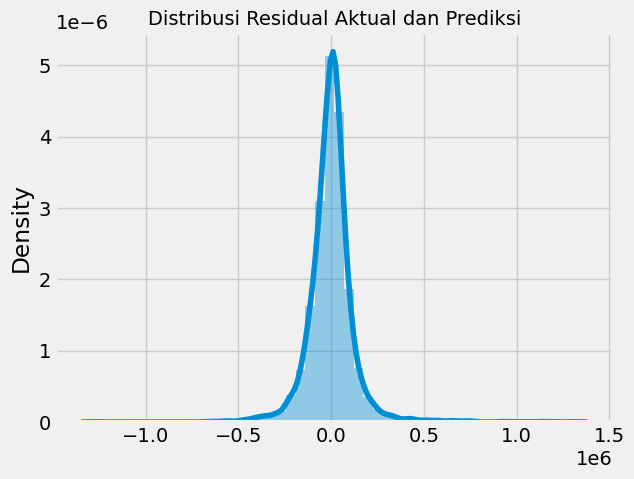

In [ ]:
residual1 = df_statsmod['harga_ril'] - df_statsmod['harga_prediksi'] #rentang atau selisih dari harga asli rumah dengan harga prediksi rumah
sns.distplot(residual1)
plt.title('Distribusi Residual Aktual dan Prediksi', fontsize=14)
plt.show()

In [ ]:
# masukin residual ke dataframe
df_statsmod['residual'] = residual1
df_statsmod.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sale_age,umur,rennovated,basement,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,harga_ril,harga_prediksi,residual
0,-1.329609,-0.152750,-0.084184,-1.428350,-1.653268,-0.150543,1.013376,0.901510,-0.219401,1.255522,...,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,132500.0,142461.687207,-9961.687207
1,-0.610436,-0.210301,-0.084184,-1.114423,-0.690245,-0.244042,1.152212,1.037004,-0.219401,1.255522,...,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,415000.0,518881.996823,-103881.996823
2,-0.305333,0.619838,-0.084184,-0.740125,0.112274,1.310149,-0.305560,-0.385680,-0.219401,1.255522,...,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,494000.0,353569.773205,140430.226795
3,-1.013609,-0.293114,-0.084184,-1.392128,-0.704836,-0.268975,-0.479104,-0.555048,-0.219401,1.255522,...,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,355000.0,277493.684140,77506.315860
4,-0.621333,-0.260294,-0.084184,-0.945385,-0.500559,-0.303399,0.909250,0.799890,-0.219401,1.255522,...,-0.105103,-0.112086,-0.112086,-0.108648,-0.07348,-0.117873,-0.1146,606000.0,534455.877516,71544.122484


2. Uji Homoskedastisitas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

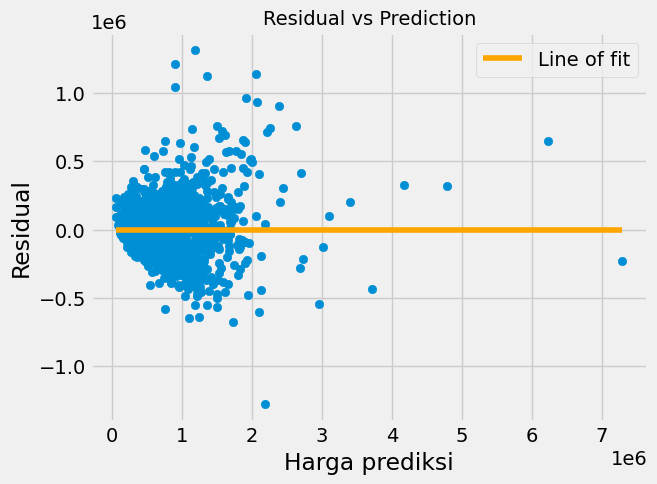

In [ ]:
# Plot residual vs prediction
x_values = [df_statsmod['harga_prediksi'].min(), df_statsmod['harga_prediksi'].max()]
y_values = [0, 0]
asm_homosk = sns.lineplot(x=x_values, y=y_values, color='orange', label='Line of fit')
plt.scatter(df_statsmod['harga_prediksi'], df_statsmod['residual'])
plt.xlabel('Harga prediksi')
plt.ylabel('Residual')
plt.title('Residual vs Prediction', fontsize=14)
plt.legend()

Dari grafik dapat disimpulkan bahwa residual antara prediksi harga berdistribusi acak. Sehingga 2 asumsi sudah terpenuhi

Modeling dengan Decision Tree regresor

In [ ]:
dtr = DecisionTreeRegressor(random_state=42).fit(X_tr, y_tr)
y_tr_dtr_pred = dtr.predict(X_tr)
y_tt_dtr_pred = dtr.predict(X_tt)

In [ ]:
train_test_metrics(y_tr, y_tt, y_tr_dtr_pred, y_tt_dtr_pred)
print("")
dtr_mse, dtr_bias, dtr_var = bias_variance_decomp(dtr, X_tr_sc.values, y_tr.values, X_tt_sc.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(dtr_mse))
print('Rata-rata bias: ', "{:.4e}".format(dtr_bias))
print('Rata-rata varians: ', "{:.4e}".format(dtr_var))

Skor Latih R^2:  0.9999
Skor Latih MAE:  165
Skor Latih MSE:  1.3013e+07


<IPython.core.display.Javascript object>

Skor Latih RMSE:  3607


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.3401e+11

Skor Latih R^2 Score:  0.6582
Skor Latih MAE:  121877
Skor Latih MSE:  4.6851e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  216450


<IPython.core.display.Javascript object>

Skor Latih Bias:  -7495.9


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.1354e+11

Rata-rata loss yang diharapkan:  5.9208e+10
Rata-rata bias:  2.4157e+10
Rata-rata varians:  3.5051e+10


In [ ]:
# Membuat pipeline lalu mencari nilai parameter terbaik dengan cv

# argumen squared itu false
rmse_1 = partial(mean_squared_error, squared=False)

# buat skor
rmse_scorer = make_scorer(rmse_1, greater_is_better=False) #skor lebih rendah is good

In [ ]:
# pipeline tabungnya
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

In [ ]:
dtr_2 = DecisionTreeRegressor()
param_grid = [{ #daftar parameter untuk cv nanti
               'decisiontreeregressor__max_depth': [1, 2, 5, 10, 15, 20],
               'decisiontreeregressor__min_samples_leaf': [1, 5, 10, 20, 50],
               'decisiontreeregressor__max_leaf_nodes': [5, 10, 20, 50, 100],
               'decisiontreeregressor__min_samples_split': [5, 10, 20, 40]
             }]

In [ ]:
# cv
gs = GridSearchCV(pipe_tree, param_grid=param_grid, cv=10, scoring=rmse_scorer, verbose=1) #cari parameter terbaik
gs.fit(X_tr, y_tr)
print(f"Hasil latih: {gs.best_score_}")
print(gs.best_estimator_)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Hasil latih: -204703.0789506295
Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=20, max_leaf_nodes=100,
                                       min_samples_leaf=10,
                                       min_samples_split=40, random_state=1))])


In [ ]:
gs_model = gs.best_estimator_
gs_model.fit(X_tr, y_tr)
gs_tr_pred = gs_model.predict(X_tr)
gs_tt_pred = gs_model.predict(X_tt)

In [ ]:
train_test_metrics(y_tr, y_tt, gs_tr_pred, gs_tt_pred)
print("")
gs_mse, gs_bias, gs_var = bias_variance_decomp(gs_model, X_tr.values, y_tr.values, X_tt.values, y_tt.values, loss='mse', random_seed=42)
print('Average expected loss: ', "{:.4e}".format(gs_mse))
print('Average bias: ', "{:.4e}".format(gs_bias))
print('Average variance: ', "{:.4e}".format(gs_var))

Skor Latih R^2:  0.7615
Skor Latih MAE:  116133
Skor Latih MSE:  3.1964e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  178784


<IPython.core.display.Javascript object>

Skor Latih Bias:  0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.0205e+11

Skor Latih R^2 Score:  0.7037
Skor Latih MAE:  124601
Skor Latih MSE:  4.0606e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  201508


<IPython.core.display.Javascript object>

Skor Latih Bias:  -398.89


<IPython.core.display.Javascript object>

Skor Latih Variance:  9.6434e+10

Average expected loss:  4.4543e+10
Average bias:  3.2418e+10
Average variance:  1.2124e+10


In [ ]:
dtr_3 = DecisionTreeRegressor(max_depth=20,
                              max_leaf_nodes=100,
                              min_samples_leaf=10,
                              min_samples_split=40,
                              random_state=1).fit(X_tr, y_tr)

In [ ]:
top_feat_dtr = pd.DataFrame(dtr_3.feature_importances_,
                            index=X_tr.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

<IPython.core.display.Javascript object>

In [ ]:
top_feat_dtr.head(20)

,importance
sqft_living^2,0.424889
sqft_living,0.146194
sqft_living15 umur,0.084031
sqft_living sqft_living15,0.061126
sqft_living basement,0.039632
zipcode_98004,0.025168
grade_9,0.022371
sqft_above sqft_living15,0.020431
waterfront sqft_living15,0.019309
sqft_living umur,0.019004


20 top feature atau fitur terbaik pada model decision tree regressor

In [ ]:
dtr_zero = top_feat_dtr.loc[top_feat_dtr.importance == 0]
dtr_zero.index.tolist()

['grade_12',
 'zipcode_98032',
 'zipcode_98028',
 'zipcode_98027',
 'zipcode_98024',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'grade_4',
 'zipcode_98022',
 'zipcode_98002',
 'grade_3',
 'grade_13',
 'zipcode_98198',
 'zipcode_98188',
 'zipcode_98178',
 'zipcode_98001',
 'zipcode_98003',
 'zipcode_98019',
 'zipcode_98177',
 'zipcode_98005',
 'zipcode_98007',
 'zipcode_98010',
 'zipcode_98014',
 'grade_5',
 'zipcode_98011',
 'zipcode_98053',
 'zipcode_98034',
 'zipcode_98107',
 'zipcode_98155',
 'zipcode_98148',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98146',
 'zipcode_98126',
 'zipcode_98144',
 'zipcode_98133',
 'zipcode_98108',
 'zipcode_98106',
 'zipcode_98038',
 'zipcode_98105',
 'zipcode_98045',
 'zipcode_98136',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98059',
 'condition_5',
 'zipcode_98168',
 'zipcode_98070',
 'zipcode_98072',
 'zi

list dari fitur-fitur yang tidak terlalu baik untuk digunakan, dari paling atas

Membuat model Random Forest dengan random forest regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100,
                           max_features='auto',
                           max_depth=100,
                           min_samples_leaf=4,
                           min_samples_split=10,
                           random_state=1).fit(X_tr, y_tr)

rf_tr_pred = rf.predict(X_tr)
rf_tt_pred = rf.predict(X_tt)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
# ada perubahan dari segi rumus perhitungan evaluasi model khussu untuk random forest
print('Skor Latih R^2 Score: ', round(r2_score(y_tr, rf_tr_pred), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_tr, rf_tr_pred), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tr, rf_tr_pred)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_tr, rf_tr_pred)), 2))
print('Skor Latih Bias: ', bias(y_tr, rf_tr_pred))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_tr_pred)))
print("")
print('Skor Uji R^2 Score: ', round(r2_score(y_tt, rf_tt_pred), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_tt, rf_tt_pred), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_tt, rf_tt_pred)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_tt, rf_tt_pred)), 2))
print('Skor Uji Bias: ', round(bias(y_tt, rf_tt_pred), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_tt_pred)))

Skor Latih R^2 Score:  0.9219
Skor Latih MAE:  55237.2
Skor Latih MSE:  1.0472e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  102331.18


<IPython.core.display.Javascript object>

Skor Latih Bias:  -157.29


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.0783e+11

Skor Uji R^2 Score:  0.8099
Skor Uji MAE:  93315.51
Skor Uji MSE:  2.6053e+10


<IPython.core.display.Javascript object>

Skor Uji RMSE:  161409.45


<IPython.core.display.Javascript object>

Skor Uji Bias:  -1481.36


<IPython.core.display.Javascript object>

Skor Uji Variance:  9.7621e+10


In [ ]:
top_feat_rf = pd.DataFrame(rf.feature_importances_,
                           index=X_tr.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

top_feat_rf.head(20)

<IPython.core.display.Javascript object>

,importance
sqft_living,0.190910
sqft_living sqft_living15,0.181108
sqft_living^2,0.177329
sqft_living15 umur,0.072387
zipcode_98004,0.022567
sqft_living basement,0.018996
sqft_living umur,0.016025
grade_9,0.015400
waterfront sqft_living15,0.014565
sqft_above sqft_living15,0.014027


20 top feature atau fitur terbaik pada model random forest regressor, sepertinya terdapat sedikit perbedaan antara top 10 decision tree dan top 10 ranfom forest. Namun top featuresnya sudah dipastikan mereka-mereka

In [89]:
top_feat_rf.value_counts()

importance
0.000000      13
0.000708       1
0.001395       1
0.001447       1
0.001579       1
              ..
0.000298       1
0.000307       1
0.000316       1
0.000317       1
0.190910       1
Name: count, Length: 177, dtype: int64

Random Search Random Forest

In [88]:
# random_grid = {'n_estimators': [20, 50, 100, 150, 200], #parameter cv
#                'max_depth': [10, 20, 50, 100],
#                'min_samples_split': [2, 5, 10],
#                'min_samples_leaf': [1, 2, 4]}
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_tr, y_tr)
# rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
# best_random = rf_random.best_estimator_
# rf_random_tr = rf_random.predict(X_tr)
# rf_random_tt = rf_random.predict(X_tt)

# print('Skor Latih R^2: ', round(r2_score(y_tr, rf_random_tr), 4))
# print('Skor Latih MAE: ', round(mean_absolute_error(y_tr, rf_random_tr), 2))
# print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tr, rf_random_tr)))
# print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_tr, rf_random_tr)), 2))
# print('Skor Latih Bias: ', round(bias(y_tr, rf_random_tr), 2))
# print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_random_tr)))
# print("")
# print('Skor Uji R^2: ', round(r2_score(y_tt, rf_random_tt), 4))
# print('Skor Uji MAE: ', round(mean_absolute_error(y_tt, rf_random_tt), 2))
# print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_tt, rf_random_tt)))
# print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_tt, rf_random_tt)), 2))
# print('Skor Uji Bias: ', round(bias(y_tt, rf_random_tt), 2))
# print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_random_tt)))

In [ ]:
# top_feat_rf_rcv = pd.DataFrame(best_random.feature_importances_,
#                            index=X_tr.columns,
#                            columns=['importance']).sort_values('importance', ascending=False)
# top_feat_rf_rcv.head(20)

In [ ]:
# top_feat_rf_rcv.value_counts()

GridSearch CV terhadap Random Forest

In [90]:
param_grid2 = { #atribut cv
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search4 = GridSearchCV(estimator=rf, param_grid=param_grid2, cv=3, n_jobs=-1, verbose=2)
grid_search4.fit(X_tr, y_tr)
grid_search4.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [91]:
best_grid2 = grid_search4.best_estimator_
rf_gs_tr = best_grid2.predict(X_tr)
rf_gs_tt = best_grid2.predict(X_tt)

print('Skor Latih R^2: ', round(r2_score(y_tr, rf_gs_tr), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_tr, rf_gs_tr), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tr, rf_gs_tr)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_tr, rf_gs_tr)), 2))
print('Skor Latih Bias: ', round(bias(y_tr, rf_gs_tr), 2))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_gs_tr)))
print("")
print('Skor Uji R^2: ', round(r2_score(y_tt, rf_gs_tt), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_tt, rf_gs_tt), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_tt, rf_gs_tt)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_tt, rf_gs_tt)), 2))
print('Skor Uji Bias: ', round(bias(y_tt, rf_gs_tt), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_gs_tt)))

Skor Latih R^2:  0.781
Skor Latih MAE:  107052.92
Skor Latih MSE:  2.9344e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  171299.76


<IPython.core.display.Javascript object>

Skor Latih Bias:  -515.61


<IPython.core.display.Javascript object>

Skor Latih Variance:  6.8678e+10

Skor Uji R^2:  0.6906
Skor Uji MAE:  122759.21
Skor Uji MSE:  4.2407e+10


<IPython.core.display.Javascript object>

Skor Uji RMSE:  205928.44


<IPython.core.display.Javascript object>

Skor Uji Bias:  919.89


<IPython.core.display.Javascript object>

Skor Uji Variance:  6.2763e+10


In [92]:
top_feat_rf_gs = pd.DataFrame(best_grid2.feature_importances_,
                              index=X_tr.columns,
                              columns=['importance']).sort_values('importance', ascending=False)
top_feat_rf_gs.head(20)

<IPython.core.display.Javascript object>

,importance
sqft_living,0.043504
sqft_living^2,0.043124
sqft_living sqft_living15,0.042159
sqft_living sqft_above,0.032695
sqft_above^2,0.031967
sqft_above sqft_living15,0.030871
sqft_living15^2,0.029546
sqft_above,0.028676
sqft_living15,0.028001
sqft_living basement,0.027026


In [93]:
top_feat_rf_gs.value_counts()

importance
0.000000      5
0.005746      1
0.004634      1
0.004672      1
0.004681      1
             ..
0.000476      1
0.000489      1
0.000489      1
0.000520      1
0.043504      1
Name: count, Length: 185, dtype: int64

## Hasil Evaluasi setiap model
dinilai dari nilai RMSE

In [94]:
list_rmse = [[rmse(y_tr, y_tr_pred), rmse(y_tt, y_tt_pred)],  # Linear Regresi
             [rmse(y_tr, y_kb_tr_pred), rmse(y_tt, y_kb_tt_pred)], # Select Kbeset
             [rmse(y_tr, y_cb_tr_pred), rmse(y_tt, y_cb_tt_pred)], # Correlation Based
             [rmse(y_tr, y_ridge_tr), rmse(y_tt, y_ridge_tt)], # Ridge
             [rmse(y_tr, y_best_ridge_tr), rmse(y_tt, y_best_ridge_tt)], # Best Ridge
             [rmse(y_tr, y_elastic_net_tr), rmse(y_tt, y_elastic_net_tt)], # Elastic Net
             [rmse(y_tr, prediksi_ols_2), rmse(y_tt, prediksi_ols_1)], # OLS
             [rmse(y_tr, y_tr_dtr_pred), rmse(y_tt, y_tt_dtr_pred)], # Decision Tree Regresor
             [rmse(y_tr, gs_tr_pred), rmse(y_tt, gs_tt_pred)], # DTR with GridSearch CV
             [rmse(y_tr, rf_tr_pred), rmse(y_tt, rf_tt_pred)], # Ranfom Forest
             [rmse(y_tr, rf_gs_tr), rmse(y_tt, rf_gs_tt)]] # RF GridSearch CV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
indeks = ["Baseline 1", "K-Best", "Correlation Based", "Ridge", "Best Ridge", "Elastic Net", "OLS", "Decision Tree", "DT GridSearchCV", "Random Forest", "RF GridSearchCV"]
columns = ["Training RMSE", "Testing RMSE"]
rmse_df = pd.DataFrame(data=list_rmse, index=indeks, columns=columns)

<IPython.core.display.Javascript object>

In [137]:
rmse_df

,Training RMSE,Testing RMSE
Baseline 1,133648.67,138986.71
K-Best,224125.07,221599.32
Correlation Based,224125.07,221599.32
Ridge,133655.13,140709.35
Best Ridge,133709.34,140813.75
Elastic Net,142737.39,147576.14
OLS,133648.56,125127.45
Decision Tree,3607.41,216450.10
DT GridSearchCV,178784.95,201508.80
Random Forest,102331.18,161409.45


- Model yang memiliki perbedaan besar antara RMSE pada data latih dan data uji (seperti Decision Tree) mungkin cenderung overfitting.
- Model seperti Linear Regression, Ridge, dan OLS menunjukkan perbedaan yang relatif kecil antara RMSE pada data latih dan data uji, menunjukkan performa yang lebih stabil.

In [97]:
top_feat_ridge.index[0]

'sqft_living sqft_living15'

In [130]:
list_top3 = [
    [sel_columns[0], sel_columns[1], sel_columns[2]],
    [selected_features[0], selected_features[1], selected_features[2]],
    [top_feat_ridge.index[0], top_feat_ridge.index[1], top_feat_ridge.index[2]],
    [top_feat_dtr.index[0], top_feat_dtr.index[1], top_feat_dtr.index[2]],
    [top_feat_rf.index[0], top_feat_rf.index[1], top_feat_rf.index[2]],
    [top_feat_rf_gs.index[0], top_feat_rf_gs.index[1], top_feat_rf_gs.index[2]]
]

index_3 = ["KBest", "Correlation Based", "Ridge", "Decision Tree Regressor", "Random Forest", "RF GridSearch"]
columns = ["First", "Second", "Third"]

top3_df = pd.DataFrame(data=list_top3, index=index_3, columns=columns)

In [131]:
top3_df

,First,Second,Third
KBest,sqft_living,sqft_above,sqft_living15
Correlation Based,sqft_living^2,sqft_living sqft_living15,sqft_living
Ridge,sqft_living sqft_living15,sqft_above sqft_living15,sqft_above rennovated
Decision Tree Regressor,sqft_living^2,sqft_living,sqft_living15 umur
Random Forest,sqft_living,sqft_living sqft_living15,sqft_living^2
RF GridSearch,sqft_living,sqft_living^2,sqft_living sqft_living15


In [141]:
# last percobaan dengan random forest regressor
rf_final = RandomForestRegressor(n_estimators=300,
                           max_features=3,
                           max_depth=110,
                           min_samples_leaf=3,
                           min_samples_split=10,
                           random_state=1).fit(X_tr, y_tr)
rf_final.fit(X_tr, y_tr)

rf_best_tr_pred = rf_final.predict(X_tr)
rf_best_tt_pred = rf_final.predict(X_tt)

In [142]:
print('Skor Latih R^2 Score: ', round(r2_score(y_tr, rf_best_tr_pred), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_tr, rf_best_tr_pred), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tr, rf_best_tr_pred)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_tr, rf_best_tr_pred)), 2))
print('Skor Latih Bias: ', bias(y_tr, rf_best_tr_pred))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_best_tr_pred)))
print("")
print('Skor Uji R^2 Score: ', round(r2_score(y_tt, rf_best_tt_pred), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_tt, rf_best_tt_pred), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_tt, rf_best_tt_pred)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_tt, rf_best_tt_pred)), 2))
print('Skor Uji Bias: ', round(bias(y_tt, rf_best_tt_pred), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_best_tt_pred)))

Skor Latih R^2 Score:  0.7781
Skor Latih MAE:  107510.06
Skor Latih MSE:  2.9745e+10


<IPython.core.display.Javascript object>

Skor Latih RMSE:  172467.93


<IPython.core.display.Javascript object>

Skor Latih Bias:  -200.27


<IPython.core.display.Javascript object>

Skor Latih Variance:  6.8349e+10

Skor Uji R^2 Score:  0.6876
Skor Uji MAE:  122860.46
Skor Uji MSE:  4.2818e+10


<IPython.core.display.Javascript object>

Skor Uji RMSE:  206926.18


<IPython.core.display.Javascript object>

Skor Uji Bias:  1124.83


<IPython.core.display.Javascript object>

Skor Uji Variance:  6.2637e+10


Sepertinya dengan menrapkan hasil GridSearchCV pada random forest regressor itu hasil evaluasinya masih belum cukup baik dibandingkan dengan OLS atau Best RIdge

Gradient Boost Regresion Tree

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=100).fit(X_tr, y_tr) #objek dan langsung latih

y_gbrt_tr_pred = gbrt.predict(X_tr)
y_gbrt_tt_pred = gbrt.predict(X_tt)

In [ ]:
print("Feature Importances: ", gbrt.feature_importances_)

Model Final yang digunakan dalam projek ini adalah Best Ridge dan OLS

In [ ]:
ridge_best = Ridge(alpha=8)
ridge_best.fit(X_tr_sc, y_tr)
y_best_ridge_tr = ridge_best.predict(X_tr_sc)
y_best_ridge_tt = ridge_best.predict(X_tt_sc)

train_test_metrics(y_tr, y_tt, y_best_ridge_tr, y_best_ridge_tt)
print("")

rdgb_mse, rdgb_bias, rdgb_var = bias_variance_decomp(ridge_best, X_tr_sc.values, y_tr.values, X_tt_sc.values, y_tt.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(rdgb_mse))
print('Rata-rata bias: ', "{:.4e}".format(rdgb_bias))
print('Rata-rata varians: ', "{:.4e}".format(rdgb_var))

- Skor Latih R^2:  0.8666
- Skor Latih MAE:  81496
- Skor Latih MSE:  1.7878e+10
- Skor Latih RMSE:  133709
- Skor Latih Bias:  0.0
- Skor Latih Variance:  1.1603e+11

- Skor Latih R^2 Score:  0.8553
- Skor Latih MAE:  83873
- Skor Latih MSE:  1.9829e+10
- Skor Latih RMSE:  140813
- Skor Latih Bias:  3928.68
- Skor Latih Variance:  1.1648e+11

- Rata-rata loss yang diharapkan:  2.0833e+10
- Rata-rata bias:  1.9900e+10

In [ ]:
# OLS
# OLS untuk memperkirakan parmater dalam model regresi, test y=mx+c
y_tt = y_tt.reset_index(drop=True)
X_tt_sc = X_tt_sc.reset_index(drop=True)

konstanta_1 = sm.add_constant(X_tt_sc)

model_ols_2 = sm.OLS(y_tt, konstanta_1)
result_ols_2 = model_ols_2.fit()

- R-squared:                       0.886
- coefficient of determination: 0.8857627418820997

Dari fitting data test dengan statsmodel, dapat diketahui bahwa :

- Data test masuk kategori good fit dengan data train, dimana perbedaannya tidak sampai 10%.
- Kemampuan model dalam menjelaskan data adalah 88,4%

Koefisien yang memiliki nilai absolut yang lebih tinggi menunjukkan pengaruh yang lebih besar terhadap harga rumah. Perhatikan fitur-fitur dengan nilai P>|t| yang sangat rendah (biasanya < 0.05) untuk memastikan keandalan pengaruhnya terhadap harga rumah.
- sqft_living basement
- sqft_lot sqft_living15
- sqft_living
- sqft_living sqft_above
- sqft_living sqft_lot15
- sqft_living15 viewed
- sqft_living sale_age

### Export model last terbaik yang sudah dilatih, diuji dengan diprediksi itu digunakan menjadi format pickle atau h5?? idkk

In [149]:
# Menyimpan model Best Ridge ke dalam file pickle
ridge_model_path = '/content/drive/MyDrive/Colab Notebooks/dataset/best_ridge_model.pkl'
with open(ridge_model_path, 'wb') as f:
    pickle.dump(ridge_best, f)

# Menyimpan model OLS ke dalam file pickle
# ols_model_path = '/content/drive/MyDrive/Colab Notebooks/dataset/ols_model.pkl'
# with open(ols_model_path, 'wb') as f:
#     pickle.dump(result_ols, f)

<IPython.core.display.Javascript object>